In [22]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src
! ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src'
/content/gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src
01-parse_data_bgl.py		hdfsparser.py		   __pycache__
bgl.ipynb			__init__.py		   splitdatabgl.ipynb
converter.ipynb			l1_comparison.ipynb	   splitdatabgl.py
extensions			l1_comparison_tfidf.ipynb  vif_l1.ipynb
feature_importance.ipynb	logrep			   vif_l1_tfidf.ipynb
feature_importance_tfidf.ipynb	main.py
hdfs.ipynb			models


In [23]:
from models.traditional_withSVM import SVM
from models.traditional import DecisionTree
from models.traditional import LR
from extensions.stat_ranking import ModelData
from splitdatabgl import split_bgl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance

In [24]:
data = np.load('../data/BGL/text-tfidf-template-BGL.log.structured2.npz')
train_x = data['x_train']
train_y = data['y_train']
test_x = data['x_test']
test_y = data['y_test']

In [25]:
event_ids = pd.read_csv('../data/BGL/BGL.event_ids.csv')
event_ids = event_ids.drop(event_ids.columns[0], axis=1)
feature_names = range(0, len(train_x[0]))

In [26]:
decision_tree = DecisionTree()
decision_tree.fit(train_x, train_y)

====== Model summary ======


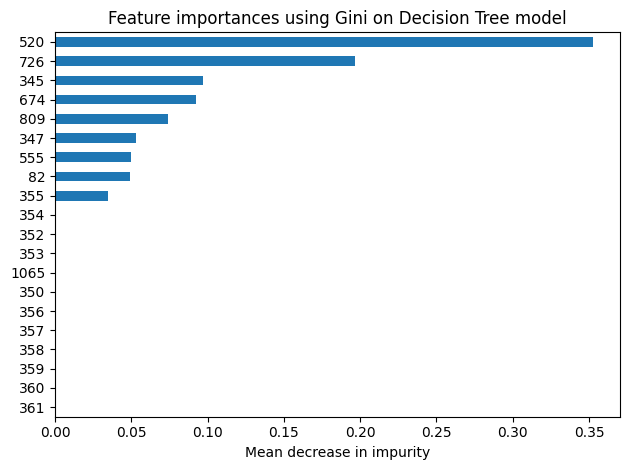

In [27]:
mdi_importances = pd.Series(
    decision_tree.classifier.feature_importances_, index=feature_names
).sort_values(ascending=True)

ax1 = mdi_importances.tail(20).plot.barh()
ax1.set_title("Feature importances using Gini on Decision Tree model")
ax1.set_xlabel("Mean decrease in impurity") # changed ylabel to xlabel
ax1.figure.tight_layout()

In [28]:
print(mdi_importances.tail(20))

361     0.000000
360     0.000000
359     0.000000
358     0.000000
357     0.000000
356     0.000000
350     0.000000
1065    0.000000
353     0.000000
352     0.000000
354     0.000000
355     0.035031
82      0.049456
555     0.050045
347     0.052860
809     0.074273
674     0.092201
345     0.096857
726     0.196654
520     0.352624
dtype: float64


In [29]:
#result = permutation_importance(
#    decision_tree.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
#)

#permutation_importances = pd.Series(result.importances_mean).sort_values(ascending=True).tail(20)

#fig, ax = plt.subplots()
#permutation_importances.plot.bar(yerr=result.importances_std, ax=ax)
#ax.set_title("Feature importances using permutation on full model")
#ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
#plt.show()

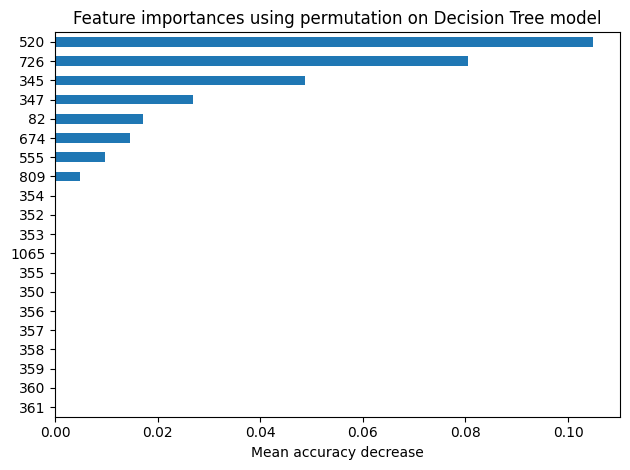

In [30]:
result = permutation_importance(
    decision_tree.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.barh()
ax2.set_title("Feature importances using permutation on Decision Tree model")
ax2.set_xlabel("Mean accuracy decrease") # changed ylabel to xlabel
ax2.figure.tight_layout()

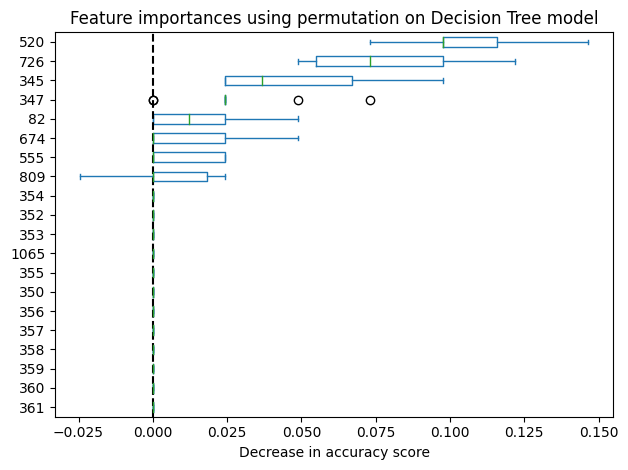

In [31]:
sorted_importances_idx = result.importances_mean.argsort()
importances_last_20 = sorted_importances_idx[-20:]
importances = pd.DataFrame(
    result.importances[importances_last_20].T,
    columns=permutation_importances.index,
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Feature importances using permutation on Decision Tree model")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [32]:
lr = LR()
lr.fit(train_x, train_y)

====== Model summary ======


In [33]:
#mdi_importances = pd.Series(
#    lr.classifier.feature_importances_, index=feature_names
#).sort_values(ascending=True)

#ax1 = mdi_importances.tail(20).plot.barh()
#ax1.set_title("Feature importances using Gini on LR model")
#ax1.set_xlabel("Mean decrease in importance") # changed ylabel to xlabel
#ax1.figure.tight_layout()

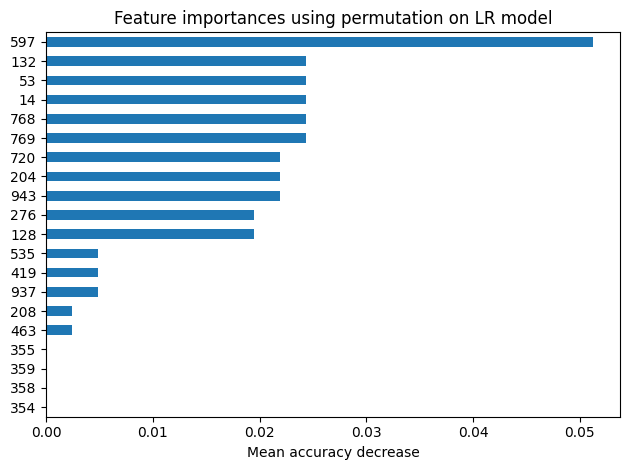

In [34]:
result = permutation_importance(
    lr.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.barh()
ax2.set_title("Feature importances using permutation on LR model")
ax2.set_xlabel("Mean accuracy decrease") # changed ylabel to xlabel
ax2.figure.tight_layout()

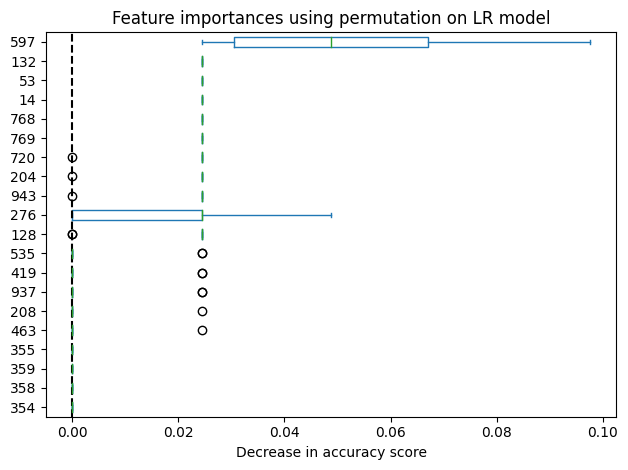

In [35]:
sorted_importances_idx = result.importances_mean.argsort()
importances_last_20 = sorted_importances_idx[-20:]
importances = pd.DataFrame(
    result.importances[importances_last_20].T,
    columns=permutation_importances.index,
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Feature importances using permutation on LR model")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [36]:
svm = SVM()
svm.fit(train_x, train_y)

====== Model summary ======


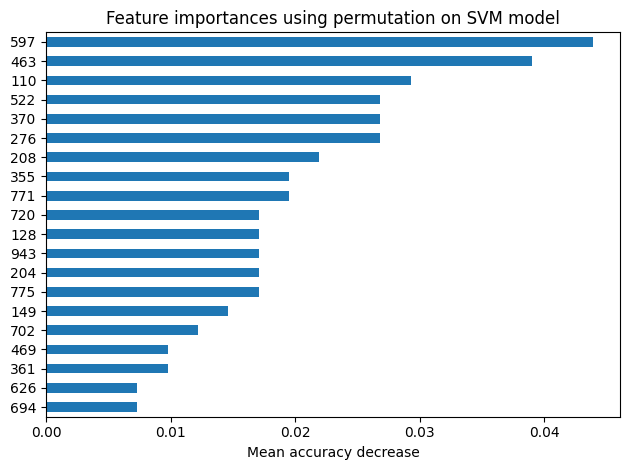

In [37]:
result = permutation_importance(
    svm.classifier, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)

permutation_importances = pd.Series(result.importances_mean, index=feature_names).sort_values(ascending=True).tail(20)

ax2 = permutation_importances.plot.barh()
ax2.set_title("Feature importances using permutation on SVM model")
ax2.set_xlabel("Mean accuracy decrease") # changed ylabel to xlabel
ax2.figure.tight_layout()

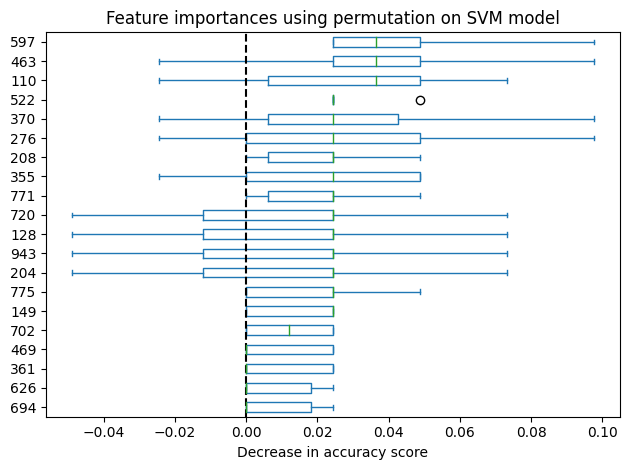

In [38]:
sorted_importances_idx = result.importances_mean.argsort()
importances_last_20 = sorted_importances_idx[-20:]
importances = pd.DataFrame(
    result.importances[importances_last_20].T,
    columns=permutation_importances.index,
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Feature importances using permutation on SVM model")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [39]:
! pip install shapash

In [40]:
import shapash
from shapash import SmartExplainer

In [42]:
xpl = SmartExplainer(
  model=decision_tree.classifier
)

xpl.compile(
    x=test_x,
    y_target=test_y, # Optional: allows to display True Values vs Predicted Values
)

AttributeError: ignored

In [ ]:
print(shap_values_svm)

In [ ]:
shap.plots.waterfall(shap_values_svm)